**Group #27's Project Proposal for DSCI 100 Sect.002**

Ella Woolcott, Nylah Grewal, Anoushka Gautam, Loveleen Chandi

**Predicting Diagnosis of Heart Disease Based on Physical Indicator Variables**

**Introduction:**
Heart disease is a general term used to describe multiple medical conditions relating to the heart. Analyzing data relating to heart disease can have broad applications in public health and medicine, as heart disease is a leading cause of death. Symptoms of heart disease include chest pains, heart palpitations, and clogged blood vessels. Risk factors include high blood pressure and cholesterol. These variables are observed in the data set…upon wrangling the data, we may observe relationships between the patient’s symptoms and outcome/diagnosis.

The predictive question we are going to answer is:
What variables give the most reliable and accurate predictor outcome? 

The heart disease data set we have chosen to analyze comes from a machine learning repository and contains 4 databases from Cleveland, Long Beach, Hungary, and Switzerland. The dataset contains a lot of medical terminology, as shown in the table of 14 variables. The possible observations for each variable in the data set are categorical, integer, or numerical values.


| Atrribute Number | Varible | Observations Possible | Definition | 
|  :----: |    :----:   |  :----:  |  :----:  |
| 1     | age       | numerical value  | number in years |
| 2   | sex        | 1 = male; 0 = female      |**FILL**      |
| 3   | cp | Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic     |chest pain type |
| 4   | trestbps        | in mm Hg on admission to the hospital     |resting blood pressure  |
| 5   | chol        |  in mg/dl     |serum cholesterol       |
| 6   | fbs        | (1 = true; 0 = false)      |fasting blood sugar > 120 mg/dl      |
| 7   | restecg        |Value 0: normal, Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria      |resting electrocardiographic results    |
| 8   | thalach        | numerical value      |maximum heart rate achieved   |
| 9   | exang        | (1 = yes; 0 = no)      |exercise induced angina      |
| 10   | oldpeak        | **FILL**      |ST depression induced by exercise relative to rest      |
| 11  | slope        | Value 1: upsloping, Value 2: flat, Value 3: downsloping      |the slope of the peak exercise ST segment     |
| 12   | ca        | 0-3      |number of major vessels colored by fluoroscopy     |
| 13   | thal        |3 = normal; 6 = fixed defect; 7 = reversible defect       |**FILL**      |
| 14  | num        | Value 0: < 50% diameter, Value 1: > 50% diameter narrowing (in any major vessel: attributes 59 through 68 are vessels)      |diagnosis of heart disease (angiographic disease status)      |

In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)
source("tests.R")
source('cleanup.R')

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

ERROR: Error in file(filename, "r", encoding = encoding): cannot open the connection


In [2]:
#Demonstrate that the dataset can be read from the web into R 
heart_data <- read.csv("data/heart_disease_uci.csv")
heart_data

id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
<int>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<lgl>,<chr>,<int>,<lgl>,<dbl>,<chr>,<int>,<chr>,<int>
1,63,Male,Cleveland,typical angina,145,233,TRUE,lv hypertrophy,150,FALSE,2.3,downsloping,0,fixed defect,0
2,67,Male,Cleveland,asymptomatic,160,286,FALSE,lv hypertrophy,108,TRUE,1.5,flat,3,normal,2
3,67,Male,Cleveland,asymptomatic,120,229,FALSE,lv hypertrophy,129,TRUE,2.6,flat,2,reversable defect,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
918,55,Male,VA Long Beach,asymptomatic,122,223,TRUE,st-t abnormality,100,FALSE,0,,NA,fixed defect,2
919,58,Male,VA Long Beach,asymptomatic,NA,385,TRUE,lv hypertrophy,NA,NA,NA,,NA,,0
920,62,Male,VA Long Beach,atypical angina,120,254,FALSE,lv hypertrophy,93,TRUE,0,,NA,,1


In [4]:
#Clean and wrangle your data into a tidy format
heart_data_2 <- na.omit(heart_data)
colnames(heart_data_2) <- c("ID", "age", "sex", "location", "chest_pain", "resting_blood_pressure", "cholesterol", "fasting_blood_sugar", "rest_ecg", "max_heart_rate", "exercise_induced_angina", "ST_depression", "ST_slope", "num_major_vessels", "thalassemia", "diagnosis")

#Datasets of other locations do not have inputs for some variables. So will limit dataframe to Cleveland.
heart_data_3 <- heart_data_2|>
    filter(location == "Cleveland")

#target variable have 5 inputs (0,1,2,3,4). 1,2,3,4 indicate presence of heart disease while 0 indicates absence of heart disease. 
heart_data_4 <- heart_data_3|>
    select(age:diagnosis, -location, -num_major_vessels)|>
    mutate(diagnosis = diagnosis/diagnosis)
heart_data_4 <- replace(heart_data_4, is.na(heart_data_4), 0)
heart_data_4 <- heart_data_4|>
   mutate(diagnosis = as_factor(diagnosis))
heart_data_4

age,sex,chest_pain,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_induced_angina,ST_depression,ST_slope,thalassemia,diagnosis
<int>,<chr>,<chr>,<int>,<int>,<lgl>,<chr>,<int>,<lgl>,<dbl>,<chr>,<chr>,<fct>
63,Male,typical angina,145,233,TRUE,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
67,Male,asymptomatic,160,286,FALSE,lv hypertrophy,108,TRUE,1.5,flat,normal,1
67,Male,asymptomatic,120,229,FALSE,lv hypertrophy,129,TRUE,2.6,flat,reversable defect,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
68,Male,asymptomatic,144,193,TRUE,normal,141,FALSE,3.4,flat,reversable defect,1
57,Male,asymptomatic,130,131,FALSE,normal,115,TRUE,1.2,flat,reversable defect,1
57,Female,atypical angina,130,236,FALSE,lv hypertrophy,174,FALSE,0.0,flat,normal,1


In [5]:
set.seed(20)
#Using only training data, summarize the data in at least one table
#Creating training dataset
heart_split <- initial_split(heart_data_4, prop = 0.75, strata = diagnosis)
heart_train <- training(heart_split)
heart_train
heart_test <- testing(heart_split)
heart_test

,age,sex,chest_pain,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_induced_angina,ST_depression,ST_slope,thalassemia,diagnosis
,<int>,<chr>,<chr>,<int>,<int>,<lgl>,<chr>,<int>,<lgl>,<dbl>,<chr>,<chr>,<fct>
1,63,Male,typical angina,145,233,TRUE,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
4,37,Male,non-anginal,130,250,FALSE,normal,187,FALSE,3.5,downsloping,normal,0
5,41,Female,atypical angina,130,204,FALSE,lv hypertrophy,172,FALSE,1.4,upsloping,normal,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
296,45,Male,typical angina,110,264,FALSE,normal,132,FALSE,1.2,flat,reversable defect,1
297,68,Male,asymptomatic,144,193,TRUE,normal,141,FALSE,3.4,flat,reversable defect,1
298,57,Male,asymptomatic,130,131,FALSE,normal,115,TRUE,1.2,flat,reversable defect,1


,age,sex,chest_pain,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_induced_angina,ST_depression,ST_slope,thalassemia,diagnosis
,<int>,<chr>,<chr>,<int>,<int>,<lgl>,<chr>,<int>,<lgl>,<dbl>,<chr>,<chr>,<fct>
3,67,Male,asymptomatic,120,229,FALSE,lv hypertrophy,129,TRUE,2.6,flat,reversable defect,1
7,62,Female,asymptomatic,140,268,FALSE,lv hypertrophy,160,FALSE,3.6,downsloping,normal,1
9,63,Male,asymptomatic,130,254,FALSE,lv hypertrophy,147,FALSE,1.4,flat,reversable defect,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
283,61,Male,asymptomatic,148,203,FALSE,normal,161,FALSE,0,upsloping,reversable defect,1
292,63,Female,asymptomatic,124,197,FALSE,normal,136,TRUE,0,flat,normal,1
299,57,Female,atypical angina,130,236,FALSE,lv hypertrophy,174,FALSE,0,flat,normal,1


In [6]:
#number of men and women
count_sex <- heart_train|>
    count(sex)
count_sex

sex,n
<chr>,<int>
Female,70
Male,153


In [7]:
#number of people diagnosed with  
count_diag <- heart_train|>
    count(diagnosis)
count_diag

diagnosis,n
<fct>,<int>
0,120
1,103


In [8]:
count_sugar <- heart_train|>
    count(fasting_blood_sugar)
count_sugar

fasting_blood_sugar,n
<lgl>,<int>
FALSE,190
TRUE,33


In [9]:
count_rest_ecg <- heart_train|>
    count(rest_ecg)
count_rest_ecg

rest_ecg,n
<chr>,<int>
lv hypertrophy,113
normal,106
st-t abnormality,4


In [10]:
count_exer <- heart_train|>
    count(exercise_induced_angina)
count_exer

exercise_induced_angina,n
<lgl>,<int>
FALSE,147
TRUE,76


In [11]:
count_slope <- heart_train|>
    count(ST_slope)
count_slope

ST_slope,n
<chr>,<int>
downsloping,14
flat,102
upsloping,107


In [12]:
count_thal <- heart_train|>
    count(thalassemia)
count_thal

thalassemia,n
<chr>,<int>
,2
fixed defect,16
normal,123
reversable defect,82


In [13]:
#maximum values of discrete and continious variables (age, resting_blood_pressure, cholesterol, max_heart_rate, ST_depression)
heart_max <- heart_train|>
    summarize(across(age:ST_depression, max))|>
    select(age, resting_blood_pressure, cholesterol, max_heart_rate, ST_depression)

#minimum values of discrete and continious variables (age, resting_blood_pressure, cholesterol, max_heart_rate, ST_depression)
heart_min <- heart_train|>
    summarize(across(age:ST_depression, min))|>
    select(age, resting_blood_pressure, cholesterol, max_heart_rate, ST_depression)

In [14]:
#combining minimum and maximum rows for easier comparison. Upper row is minimum values and lower row is maximum values
heart_minmax <- bind_rows(heart_min, heart_max)
heart_minmax

age,resting_blood_pressure,cholesterol,max_heart_rate,ST_depression
<int>,<int>,<int>,<int>,<dbl>
34,94,126,88,0.0
77,200,564,195,6.2


In [15]:
#averages and standard deviations of continous or discrete variables (age, resting_blood_pressure, cholesterol, max_heart_rate, ST_depression)

heart_mean <- heart_train|>
    select(age, resting_blood_pressure, cholesterol, max_heart_rate, ST_depression)|>
    summarize(across(age:ST_depression, mean))
heart_mean

heart_sd<- heart_train|>
    select(age, resting_blood_pressure, cholesterol, max_heart_rate, ST_depression)|>
    summarize(across(age:ST_depression, sd))
heart_sd

age,resting_blood_pressure,cholesterol,max_heart_rate,ST_depression
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
54.41704,131.6771,246.6457,149.7085,1.060538


age,resting_blood_pressure,cholesterol,max_heart_rate,ST_depression
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
8.718887,18.33187,53.92968,22.01392,1.146111


In [16]:
#binding all summary statistics for continous and discrete variables into one table for easier comparison.
#From top to bottom row: minimum value, maximum value, average, standard deviation
heart_summary <- bind_rows(heart_min, heart_max, heart_mean, heart_sd)
heart_summary

age,resting_blood_pressure,cholesterol,max_heart_rate,ST_depression
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
34.000000,94.00000,126.00000,88.00000,0.000000
77.000000,200.00000,564.00000,195.00000,6.200000
54.417040,131.67713,246.64574,149.70852,1.060538
8.718887,18.33187,53.92968,22.01392,1.146111


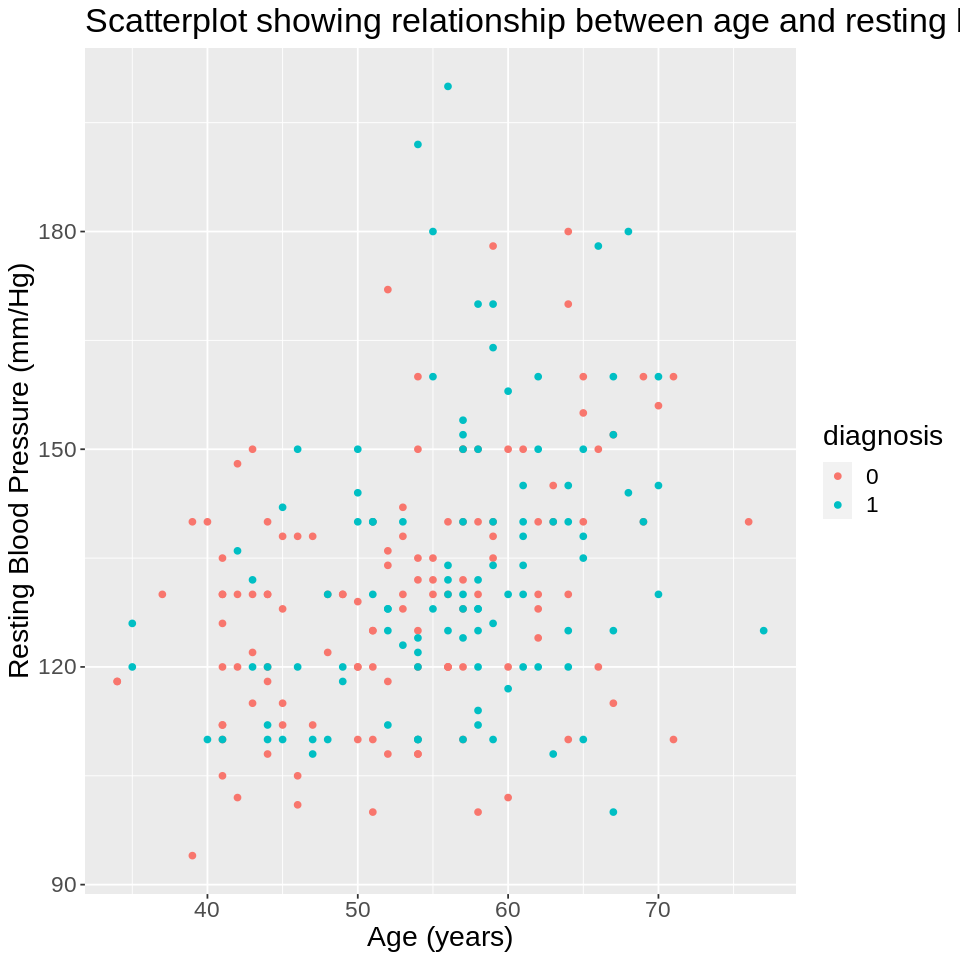

In [17]:
#Using only training data, visualize the data with at least one plot relevant to the analysis you plan to do

#scattor plot showing elationship between age and resting blood pressure, categorised by target.
options(repr.plot.width = 8, repr.plot.height = 8) 
age_resting_point <- heart_train |>
    ggplot(aes(x = age, y = resting_blood_pressure))+
    geom_point(aes(colour = diagnosis))+
    labs(x = "Age (years)", y = "Resting Blood Pressure (mm/Hg)")+
    ggtitle("Scatterplot showing relationship between age and resting blood pressure, categorised by diagnosis")+
    theme(text = element_text(size = 17))
age_resting_point

#0 = negative diagnosis. 1 = positive diagnosis.

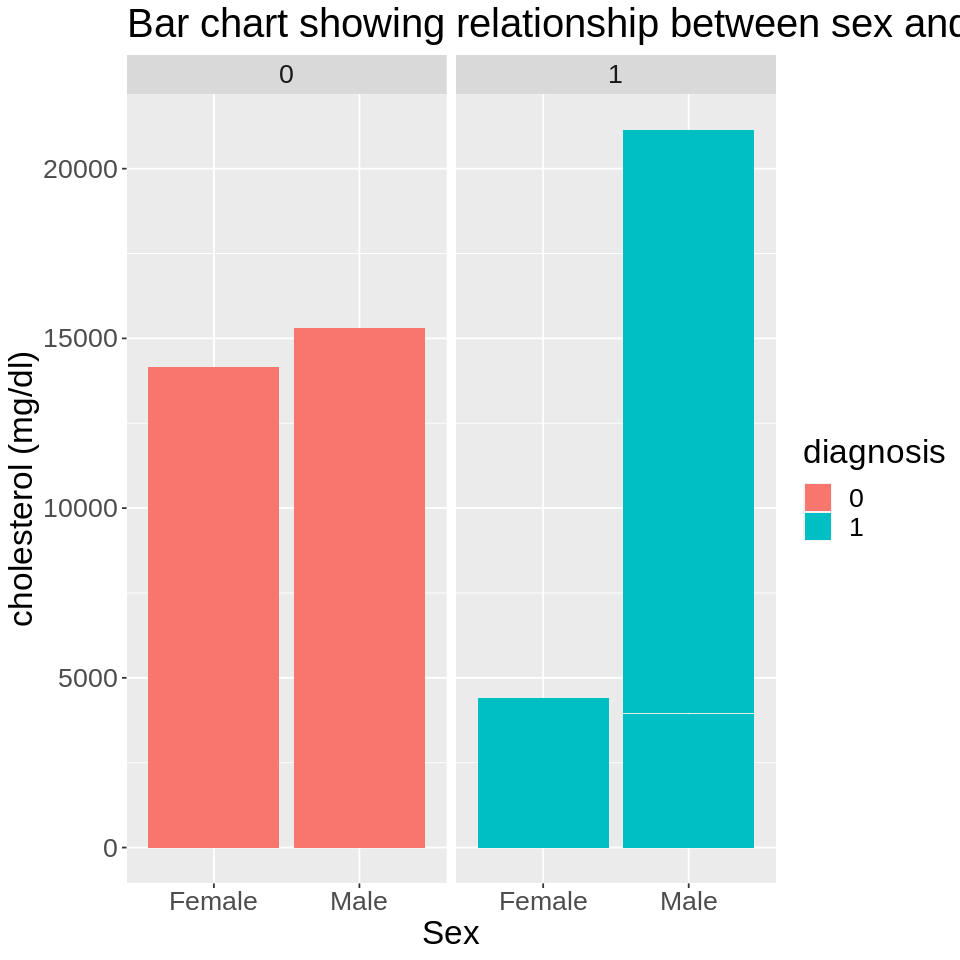

In [18]:
#bar chart showing the relations between sex and cholestrol, categorised by target
options(repr.plot.width = 8, repr.plot.height = 8) 
sex_chol_bar <- heart_train |>
    ggplot(aes(x = sex, y = cholesterol, fill = diagnosis))+
    geom_bar(stat = "identity")+
    facet_grid(cols = vars(diagnosis))+
    labs(x = "Sex", y = "cholesterol (mg/dl)")+
    ggtitle("Bar chart showing relationship between sex and cholesterol levels, categorised by diagnosis")+
    theme(text = element_text(size = 20))
sex_chol_bar

#0 = negative diagnosis. 1 = positive diagnosis.

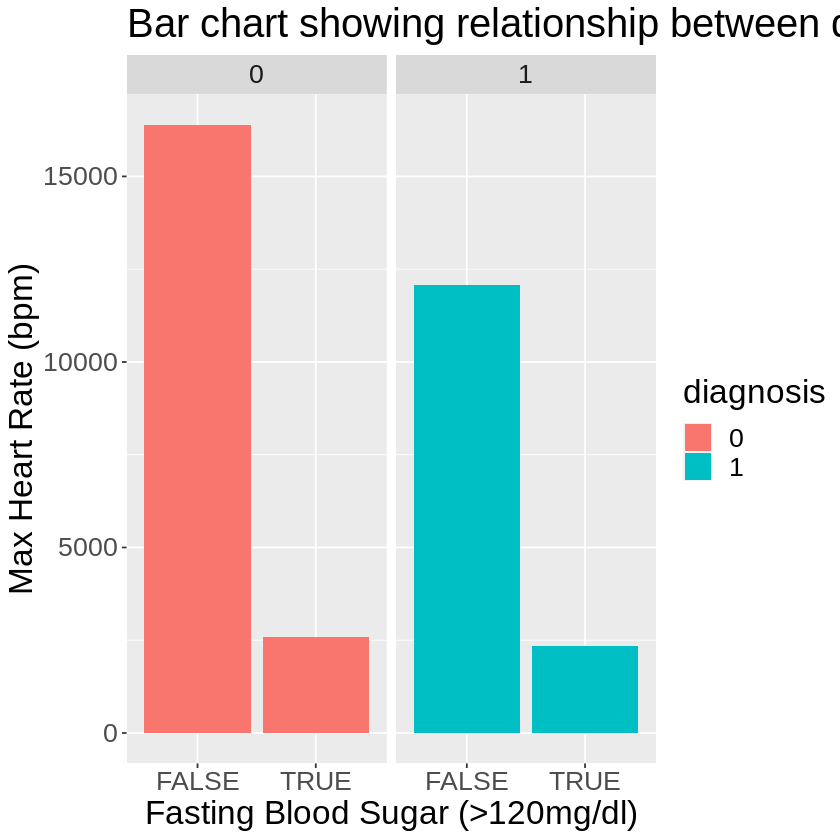

In [19]:
options(repr.plot.width = 7, repr.plot.height = 7) 
sugar_heart_bar <- heart_train |>
    ggplot(aes(x = fasting_blood_sugar, y = max_heart_rate, fill = diagnosis))+
    geom_bar(stat = "identity")+
    facet_grid(cols = vars(diagnosis))+
    labs(x = "Fasting Blood Sugar (>120mg/dl)", y = "Max Heart Rate (bpm)")+
    ggtitle("Bar chart showing relationship between diabetes and maximum heart rate, categorised by diagnosis")+
    theme(text = element_text(size = 20))
sugar_heart_bar

#0 = negative diagnosis. 1 = positive diagnosis.
#False = absence diabetes. True = presence of diabetes

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



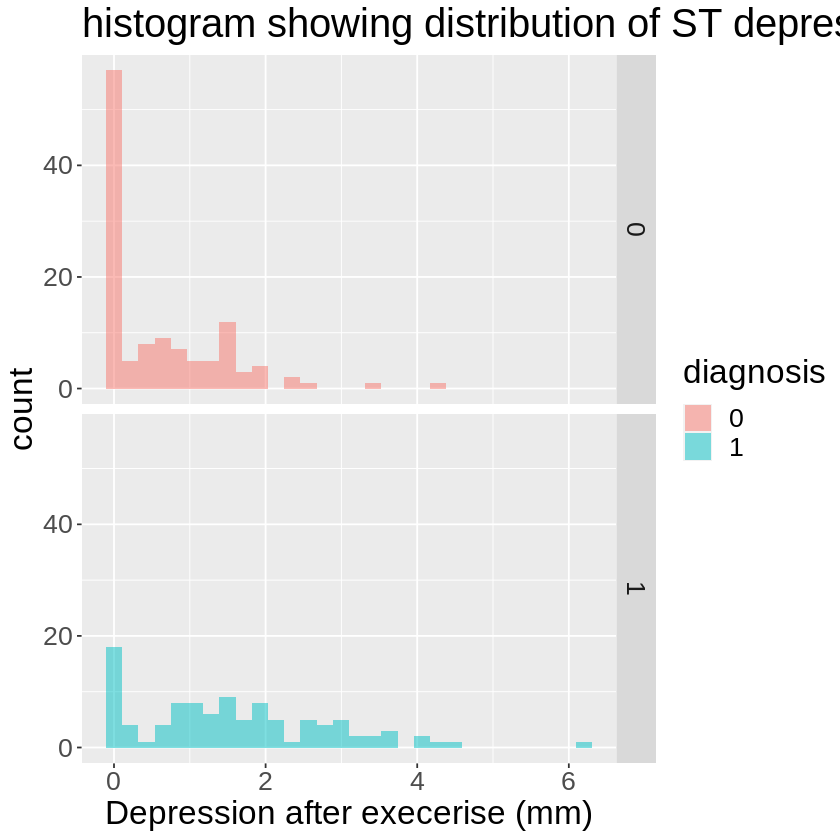

In [20]:
options(repr.plot.width = 7, repr.plot.height = 7) 
depression_hist <- heart_train |>
    ggplot(aes(x = ST_depression, fill = diagnosis))+
    facet_grid(rows = vars(diagnosis))+
    geom_histogram(alpha = 0.5, position = "identity")+
    labs(x = "Depression after execerise (mm)")+
    ggtitle("histogram showing distribution of ST depression, categorised by diagnosis")+
    theme(text = element_text(size = 20))
depression_hist

List of 1
 $ text:List of 11
  ..$ family       : NULL
  ..$ face         : NULL
  ..$ colour       : NULL
  ..$ size         : num 20
  ..$ hjust        : NULL
  ..$ vjust        : NULL
  ..$ angle        : NULL
  ..$ lineheight   : NULL
  ..$ margin       : NULL
  ..$ debug        : NULL
  ..$ inherit.blank: logi FALSE
  ..- attr(*, "class")= chr [1:2] "element_text" "element"
 - attr(*, "class")= chr [1:2] "theme" "gg"
 - attr(*, "complete")= logi FALSE
 - attr(*, "validate")= logi TRUE

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



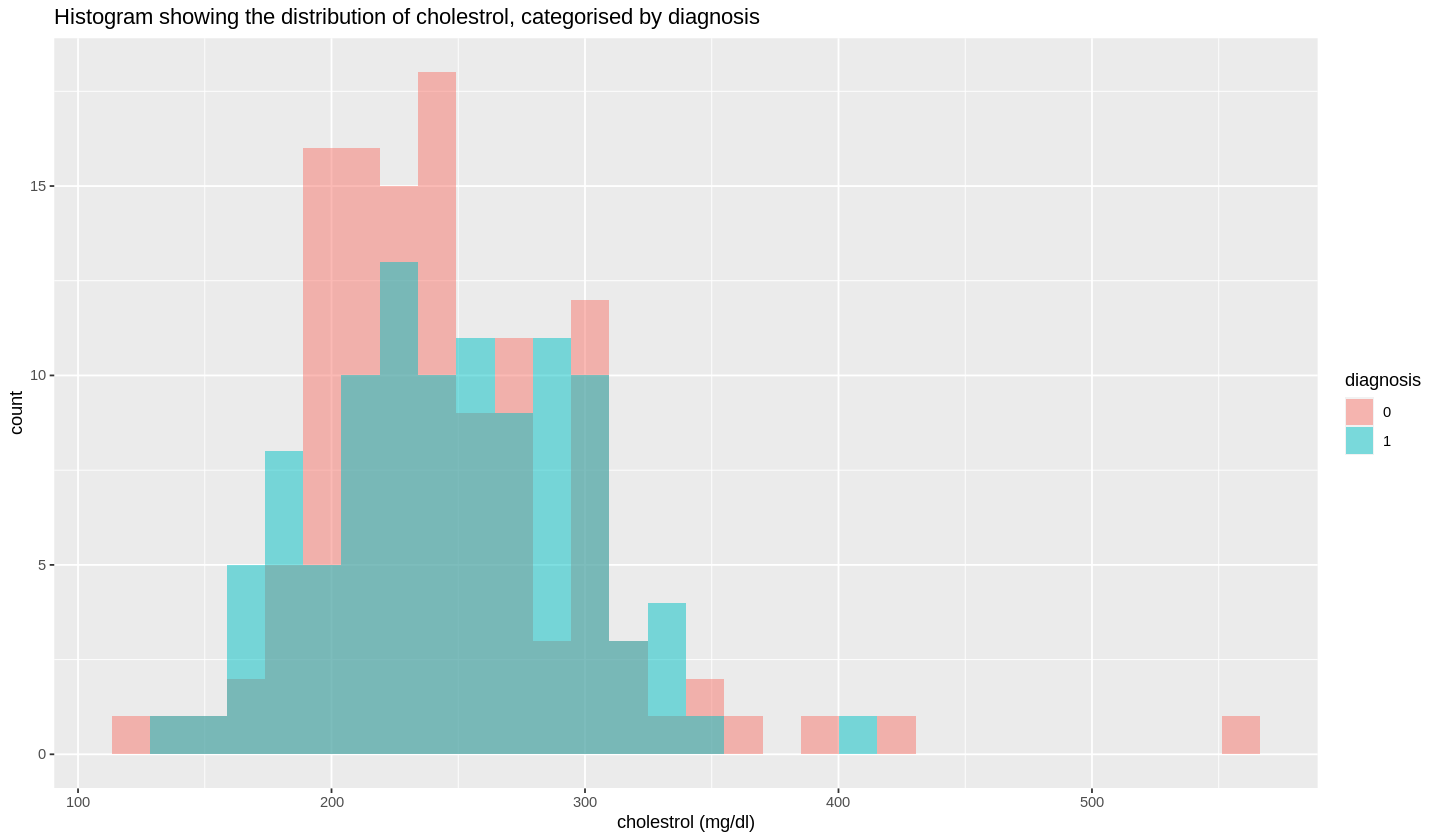

In [21]:
options(repr.plot.width = 12, repr.plot.height = 7) 
slope_hist <- heart_train |>
    ggplot(aes(x = cholesterol, fill = diagnosis))+
    geom_histogram(alpha = 0.5, position = "identity")+
    labs(x = "cholestrol (mg/dl)")+
    ggtitle("Histogram showing the distribution of cholestrol, categorised by diagnosis")
    theme(text = element_text(size = 20))
slope_hist

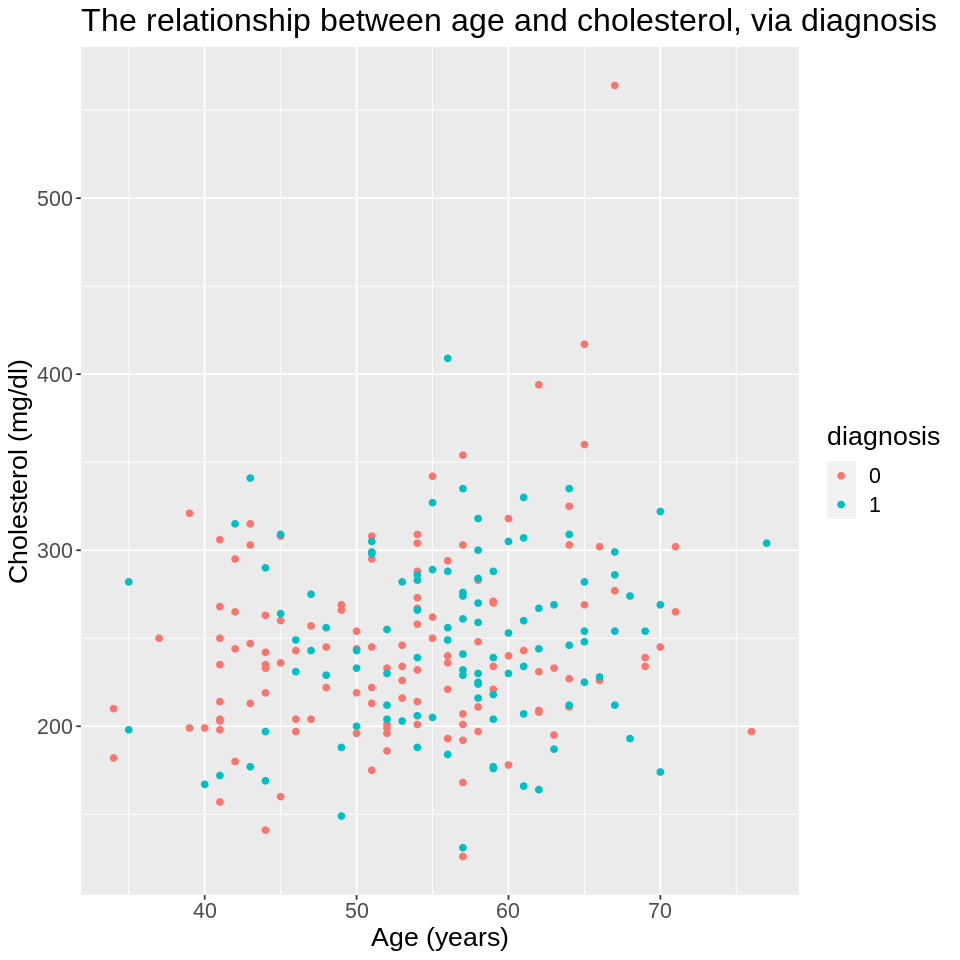

In [22]:
#scattor plot showing relationship between age and cholesterol, categorised by target.
options(repr.plot.width = 8, repr.plot.height = 8) 
age_chol_point <- heart_train |>
    ggplot(aes(x = age, y = cholesterol))+
    geom_point(aes(colour = diagnosis))+
    labs(x = "Age (years)", y = "Cholesterol (mg/dl)")+
    ggtitle("The relationship between age and cholesterol, via diagnosis")+
    theme(text = element_text(size = 16))
age_chol_point

#0 = negative diagnosis. 1 = positive diagnosis.

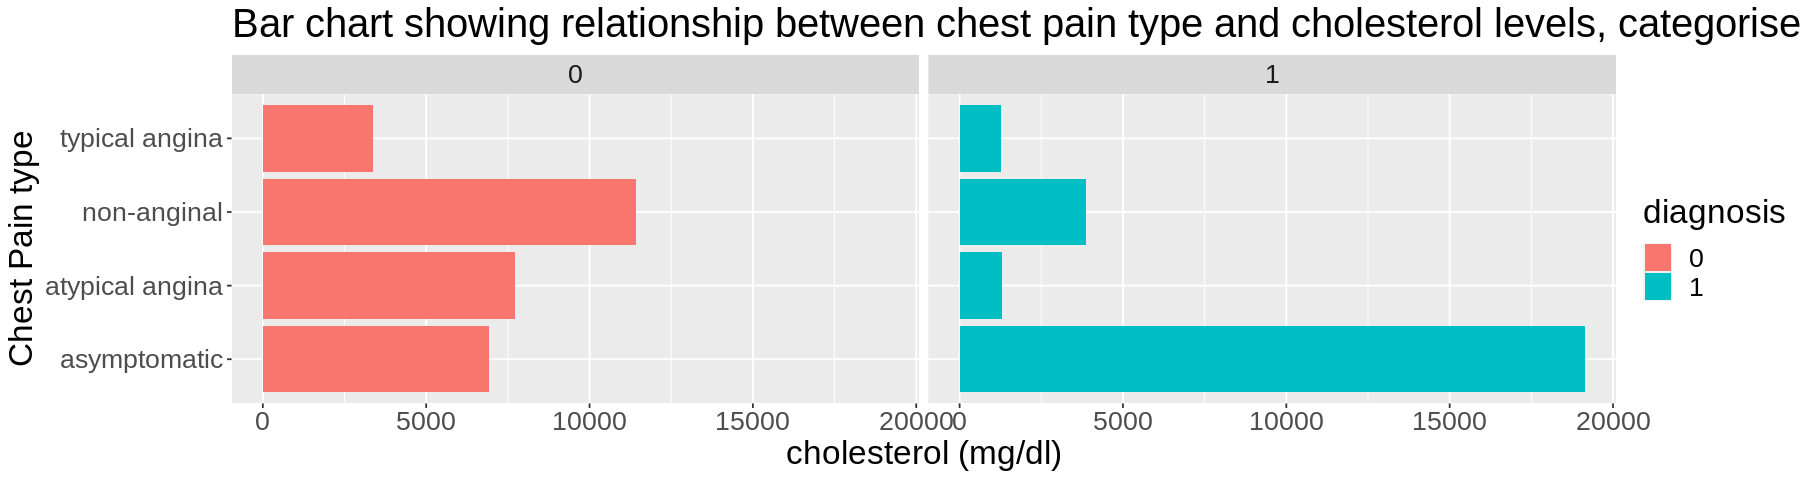

In [23]:
#bar chart showing relationship between chest pain type and cholesterol, categorised by diagnosis
options(repr.plot.width = 15, repr.plot.height = 4) 
chest_chol_bar <- heart_train |>
    ggplot(aes(x = chest_pain, y = cholesterol, fill = diagnosis))+
    geom_bar(stat = "identity")+
    facet_grid(cols = vars(diagnosis))+
    labs(x = "Chest Pain type", y = "cholesterol (mg/dl)")+
    ggtitle("Bar chart showing relationship between chest pain type and cholesterol levels, categorised by diagnosis")+
    theme(text = element_text(size = 20))

chest_chol_bar <- chest_chol_bar+coord_flip()
chest_chol_bar

#0 = negative diagnosis. 1 = positive diagnosis.

**Methods:** 

Our data originally includes 14 variables We don’t plan to use it all. We are going to start with 12 and find the best combination of them. 

Our starting 12: #1,#2,#3,#4,#5,#6,#7,#8,#9,#10,#11,#13

Excluding varible #12 - We are treating this as a null variable which just shows the amount of vessels they screened during the testing. 
                             But for our focus on physical indicators we are going to treat the data as if the number of vessels checked had no impact on the likelihood of finding 
                             heart disease. 

Predictor - #14 

To narrow down to our 6 most accurate variables our data analysis will consist of
1. Forward selection
- Filter out null variable + predictor
- Carry out forward selection (steps in 6.8.3 in textbook)  
- Make table (accuracy of each string of predictors)  
- Pick our best predictors 
2. Find best K neighbors value and plot accuracy vs. k-value
3. Create model with best predictors and best k-value 
4. Use test data with predictor model, display with table. 

*Visualizations:* 
Best K neighbor visualization will be a line graph most likely plotting accuracy vs k number. Our best predictors visualization will be a table with three columns, size, model_string and accuracy. For our final visualization of the outcome of our model (having selected the best from the above two tests) will be a table depicting the predictor variables (Value 0 or Value 1) of our test data set. 

**Expected outcomes and significance:** 

Through the process of forward selection and evaluating the accuracy of different combinations of predictors, we aim to identify the six most accurate variables for predicting heart disease from the dataset. Additionally, we plan to find the best value for the K-neighbors parameter in our model.

By determining the most accurate predictors and optimizing the K value, this analysis can lead to a more efficient and accurate heart disease prediction model-- as accurate prediction of heart disease can help in early detection, prevention, and timely treatment.

*Potential future questions:*

Are there any interactions or correlations between the selected predictors that affect the prediction of heart disease?

Can additional variables or features from the dataset be incorporated to further improve the accuracy of the heart disease prediction model?
